# Step 1: Import Dependencies and Read Data

In [1]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\nemor\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
#read data 
path = ('data/neg_pos_Joined.csv')
df = pd.read_csv(path)

# Preprocessing

In [3]:
#drop review date and create a copy for the vader model
df = df.drop(columns=['date'])
vader_df = df.copy()

In [4]:
#seperate labels and features
y=df['sent']
X=df['text']

In [5]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

# Model Training

## WordCloud

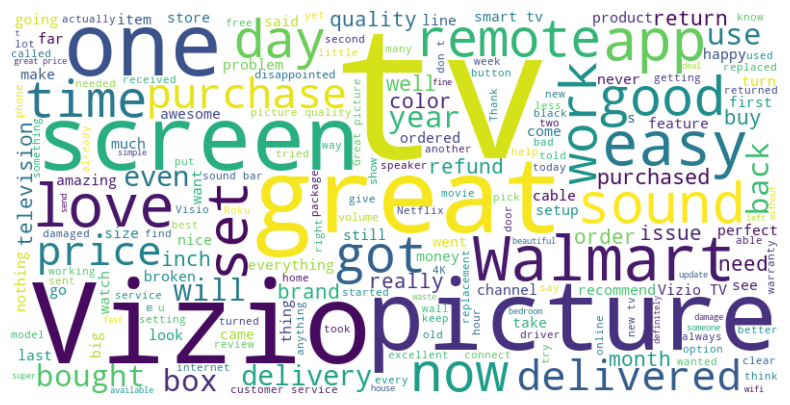

In [6]:
#extract the text column
text_data = ' '.join(df['text'])

#generate the word cloud
wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(text_data)

#display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Naive Bayes

In [7]:
#convert text data into numerical features using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [8]:
#import model
clf = MultinomialNB()

#train a Naive Bayes classifier
clf.fit(X_train_tfidf, y_train)

#make predictions
y_pred = clf.predict(X_test_tfidf)

#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       152
           1       0.92      0.97      0.94       131

    accuracy                           0.95       283
   macro avg       0.95      0.95      0.95       283
weighted avg       0.95      0.95      0.95       283



## VADER

In [9]:
#import model
sia = SentimentIntensityAnalyzer()

In [10]:
#iterate through the data and calulate the polarity scores
#for each row
res = {}
for i, row in vader_df.iterrows():
    text =  row['text']
    myid = i
    res[myid] = sia.polarity_scores(text)

In [11]:
#collect actual sentiment and predictions for classification

#list to store actual sentiment
actual = vader_df['sent'].tolist()

#list to store predicted boolean sentiment labels
predicted = []

#iterate through the polarity scores and determine if review
#is predicted negative or positive based on the compound score.
for i, score in res.items():
    if score['compound'] > 0:
        predicted.append(1)
    else: 
        score['compound'] < 0
        predicted.append(0)

#classifcation report
print(classification_report(actual, predicted))

              precision    recall  f1-score   support

           0       0.93      0.76      0.84       577
           1       0.79      0.94      0.86       553

    accuracy                           0.85      1130
   macro avg       0.86      0.85      0.85      1130
weighted avg       0.86      0.85      0.85      1130

